使用大佬预先处理好的数据，然后进行文本分类

In [2]:
import tensorflow_datasets as tfds

imdb,info =tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)



Dl Completed...: 100%|██████████| 1/1 [00:00<00:00, 71.77 url/s] 


Dataset imdb_reviews downloaded and prepared to C:\Users\WX847\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


如上显示

TFDS datasets with text encoding are deprecated and will be removed in a future version. Instead, you should use the plain text version and tokenize the text using `tensorflow_text`

弃用TFDS与文本编码的数据集,在未来的版本将被删除。相反,你应该使用纯文本版本,在标记文本使用“tensorflow_text”


In [6]:
train_data,test_data = imdb['train'],imdb['test']

In [7]:
tokenizer =info.features['text'].encoder

In [8]:
?tokenizer

Type:           SubwordTextEncoder
String form:    <SubwordTextEncoder vocab_size=8185>
File:           c:\users\wx847\anaconda3\envs\learn_tensorflow\lib\site-packages\tensorflow_datasets\core\deprecated\text\subword_text_encoder.py
Docstring:     
Invertible `TextEncoder` using word pieces with a byte-level fallback.

Encoding is fully invertible because all out-of-vocab wordpieces are
byte-encoded.

The vocabulary is "trained" on a corpus and all wordpieces are stored in a
vocabulary file. To generate a vocabulary from a corpus, use
`tfds.deprecated.text.SubwordTextEncoder.build_from_corpus`.

Typical usage:

```
# Build
encoder = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    corpus_generator, target_vocab_size=2**15)
encoder.save_to_file(vocab_fname)

# Load
encoder = tfds.deprecated.text.SubwordTextEncoder.load_from_file(vocab_fname)
ids = encoder.encode("hello world")
text = encoder.decode([1, 2, 3, 4])
```
Init docstring:
Constructs a SubwordTextEncoder from a v

In [9]:
sample_string = 'TensorFlow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print ('Tokenized string is {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The original string:{}'.format(original_string))


# expected output:
# Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
# The original string: TensorFlow, from basics to mastery


Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
The original string:TensorFlow, from basics to mastery


In [10]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [14]:
import tensorflow as tf
padded_shapes = (
    tf.TensorShape([None])
)
help(train_data.padded_batch)

Help on method padded_batch in module tensorflow.python.data.ops.dataset_ops:

padded_batch(batch_size, padded_shapes, padding_values=None, drop_remainder=False) method of tensorflow.python.data.ops.dataset_ops.ShuffleDataset instance
    Combines consecutive elements of this dataset into padded batches.
    
    This transformation combines multiple consecutive elements of the input
    dataset into a single element.
    
    Like `tf.data.Dataset.batch`, the components of the resulting element will
    have an additional outer dimension, which will be `batch_size` (or
    `N % batch_size` for the last element if `batch_size` does not divide the
    number of input elements `N` evenly and `drop_remainder` is `False`). If
    your program depends on the batches having the same outer dimension, you
    should set the `drop_remainder` argument to `True` to prevent the smaller
    batch from being produced.
    
    Unlike `tf.data.Dataset.batch`, the input elements to be batched may have

In [18]:
BUFFER_SIZE = 25000
BATCH_SIZE = 1
padded_shapes = ([None],()) 
train_data = train_data.shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE,padded_shapes=padded_shapes)
test_data = test_data.padded_batch(BATCH_SIZE,padded_shapes=padded_shapes)

In [19]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [20]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

Epoch 1/10
25000/25000 [==============================] - 278s 11ms/step - loss: 0.3385 - accuracy: 0.8546 - val_loss: 0.2999 - val_accuracy: 0.8748
Epoch 2/10
25000/25000 [==============================] - 224s 9ms/step - loss: 0.2176 - accuracy: 0.9181 - val_loss: 0.3062 - val_accuracy: 0.8720
Epoch 3/10
25000/25000 [==============================] - 216s 9ms/step - loss: 0.1810 - accuracy: 0.9324 - val_loss: 0.3423 - val_accuracy: 0.8681
Epoch 4/10
25000/25000 [==============================] - 212s 8ms/step - loss: 0.1565 - accuracy: 0.9428 - val_loss: 0.3844 - val_accuracy: 0.8640
Epoch 5/10
25000/25000 [==============================] - 212s 8ms/step - loss: 0.1364 - accuracy: 0.9505 - val_loss: 0.4114 - val_accuracy: 0.8615
Epoch 6/10
25000/25000 [==============================] - 212s 8ms/step - loss: 0.1175 - accuracy: 0.9559 - val_loss: 0.4413 - val_accuracy: 0.8530
Epoch 7/10
25000/25000 [==============================] - 235s 9ms/step - loss: 0.0994 - accuracy: 0.9643 - val

In [22]:
model.save('my_model.h5')

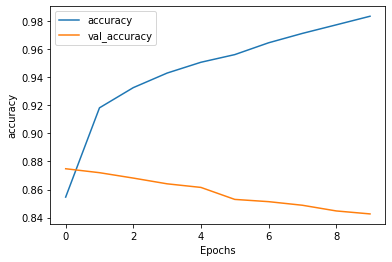

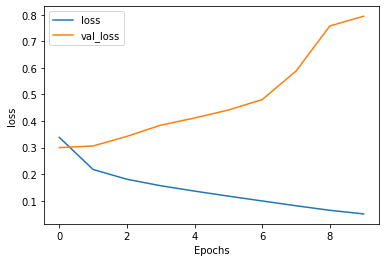

In [23]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [24]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('z_vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('z_meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

(8185, 64)
